In [22]:
project_dir = "/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/"

In [23]:
cd {frames_dir}

/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames


In [70]:
import os
files = os.listdir(frames_dir)
files

['45_110823.png',
 '27_110823.png',
 '10_110823.png',
 '3_110823.png',
 '48_110823.png',
 '36_110823.png',
 '54_110823.png',
 '18_110823.png',
 '.DS_Store',
 '33_110823.png',
 '51_110823.png',
 '40_110823.png',
 '15_110823.png',
 '22_110823.png',
 '6_110823.png',
 '1_110823.png',
 '39_110823.png',
 '47_110823.png',
 '12_110823.png',
 '25_110823.png',
 '34_110823.png',
 '28_110823.png',
 '9_110823.png',
 '31_110823.png',
 '53_110823.png',
 '4_110823.png',
 '42_110823.png',
 '20_110823.png',
 '17_110823.png',
 '19_110823.png',
 '32_110823.png',
 '50_110823.png',
 '41_110823.png',
 '14_110823.png',
 '23_110823.png',
 '7_110823.png',
 '44_110823.png',
 '26_110823.png',
 '11_110823.png',
 '2_110823.png',
 '49_110823.png',
 '37_110823.png',
 '30_110823.png',
 '52_110823.png',
 '8_110823.png',
 '5_110823.png',
 '43_110823.png',
 '21_110823.png',
 '16_110823.png',
 '38_110823.png',
 '0_110823.png',
 '46_110823.png',
 '13_110823.png',
 '24_110823.png',
 '35_110823.png',
 '29_110823.png']

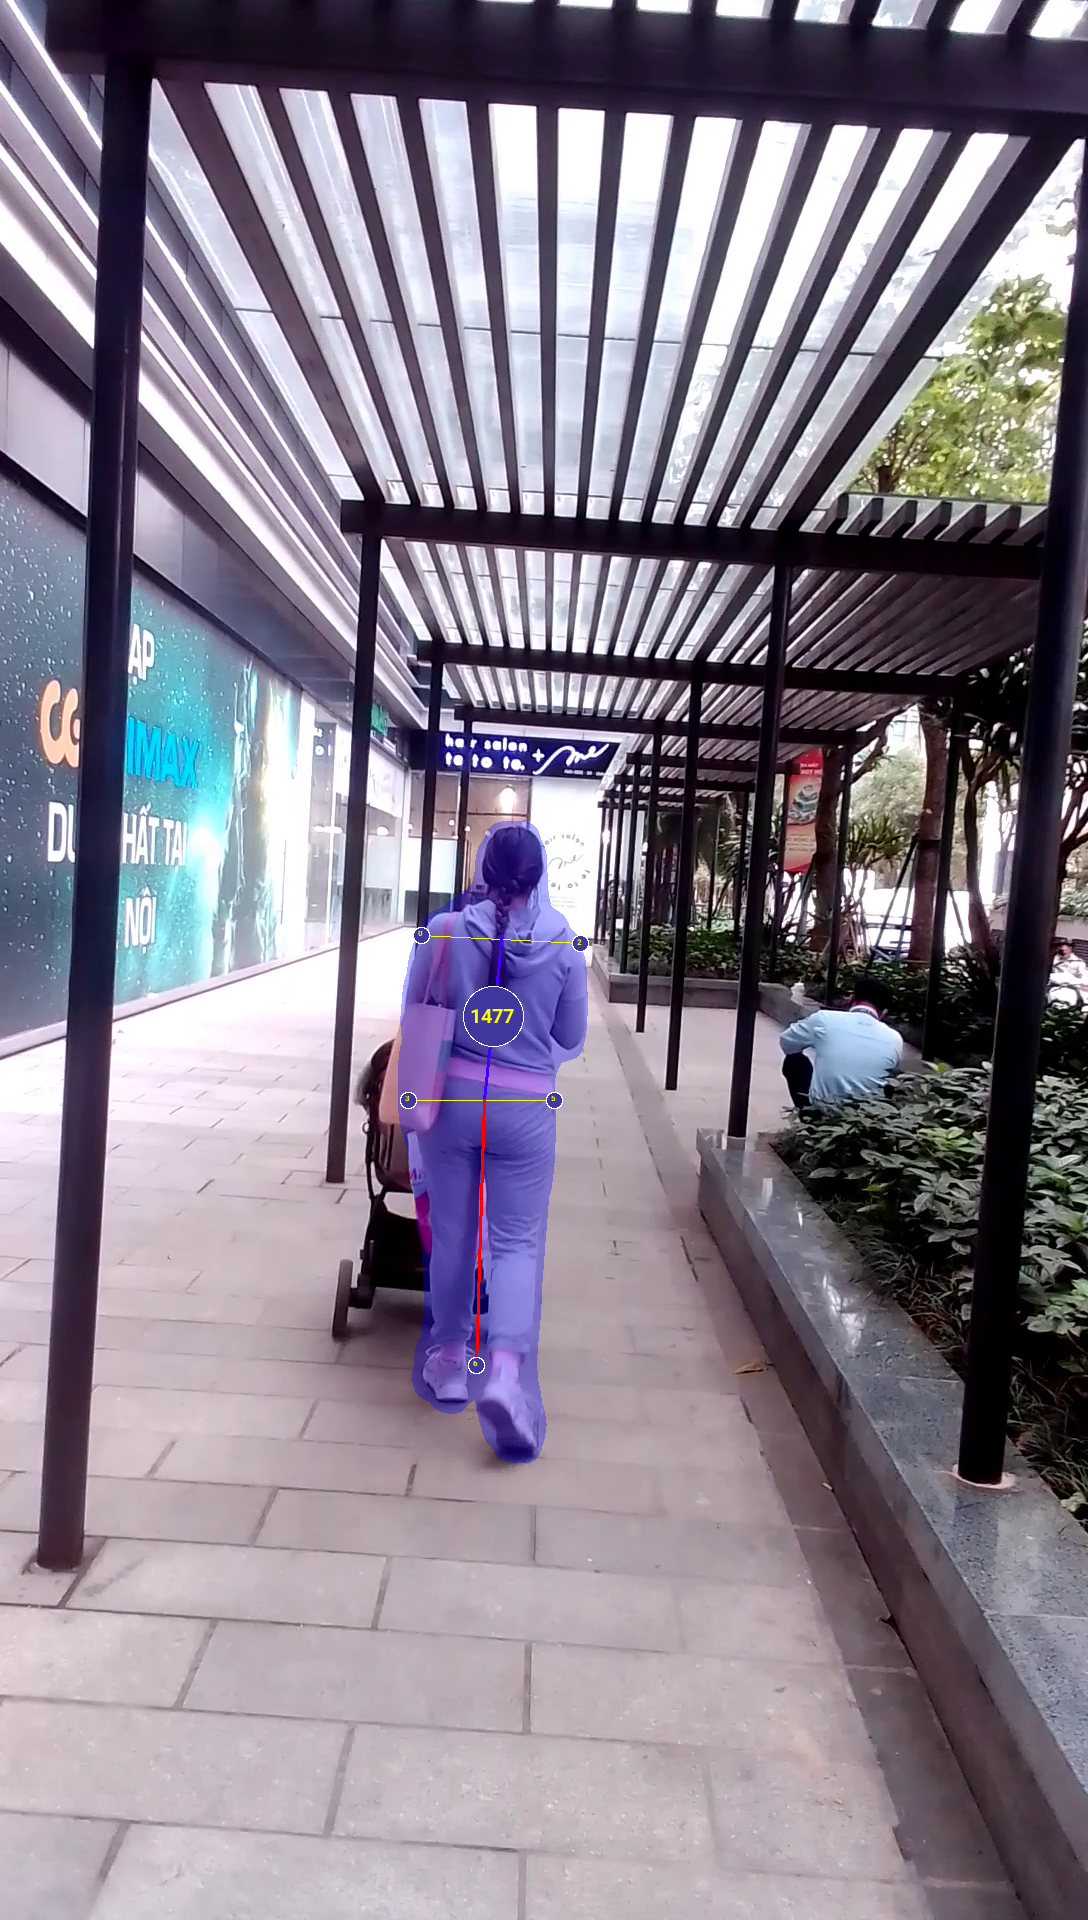

In [84]:
from PIL import Image

sample = Image.open(os.path.join(frames_dir + files[0]))
sample

In [52]:
print(frames)

['.DS_Store', '0_110823.png', '10_110823.png', '11_110823.png', '12_110823.png', '13_110823.png', '14_110823.png', '15_110823.png', '16_110823.png', '17_110823.png', '18_110823.png', '19_110823.png', '1_110823.png', '20_110823.png', '21_110823.png', '22_110823.png', '23_110823.png', '24_110823.png', '25_110823.png', '26_110823.png', '27_110823.png', '28_110823.png', '29_110823.png', '2_110823.png', '30_110823.png', '31_110823.png', '32_110823.png', '33_110823.png', '34_110823.png', '35_110823.png', '36_110823.png', '37_110823.png', '38_110823.png', '39_110823.png', '3_110823.png', '40_110823.png', '41_110823.png', '42_110823.png', '43_110823.png', '44_110823.png', '45_110823.png', '46_110823.png', '47_110823.png', '48_110823.png', '49_110823.png', '4_110823.png', '50_110823.png', '51_110823.png', '52_110823.png', '53_110823.png', '54_110823.png', '5_110823.png', '6_110823.png', '7_110823.png', '8_110823.png', '9_110823.png']


In [73]:
frames_path = ["" for x in range(len(frames)-1)]
print(frames_path)

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


In [74]:
for frame in frames:
    root_ext = os.path.splitext(frame)
    if root_ext[1] == '.png':
        frame_index = int(root_ext[0][0:-7])
        frames_path[frame_index ] = os.path.join(frames_dir + frame)

In [75]:
frames_path

['/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/0_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/1_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/2_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/3_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/4_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/5_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/6_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/7_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/8_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/9_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/10_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/11_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/12_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec23/frames/13_110823.png',
 '/Users/troydo42/Desktop/Body_Matrixes/Dec2

In [85]:
import av
def generate_video(images, output, width, height):
    container = av.open(output, mode="w")
    
    stream = container.add_stream("mpeg4", rate=30)
    stream.width = width
    stream.height = height
    
    def encode(image):
        frame = av.VideoFrame.from_image(image)
        for packet in stream.encode(frame):
            container.mux(packet)
    
    for image in images:
        pil_image = Image.open(image)
        encode(pil_image)
        
    container.close()

In [86]:
output_video = "output.mp4"
generate_video(frames_path, output_video, sample.width, sample.height)